In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt


In [8]:
# Path to the directory that contains the 10 subfolders:
base_dir = "../../Outputs/cellxgene_cutoff_random_1k_numer_of_genes_test/responses"

# Folders and the "axis label" you want for each point
folder_list = [
    ("top5genes",   "top-5"),
    ("top10genes",  "top-10"),
    ("top25genes",  "top-25"),
    ("top50genes",  "top-50"),
    ("top100genes", "top-100"),
    ("top200genes", "top-200"),
    ("top500genes", "top-500"),
    ("top1000genes","top-1000"),
    ("top2000genes","top-2000"),
    ("topallgenes", "top-all")
]

all_means = []
all_cis   = []
labels    = []

In [9]:
for (folder_name, label_text) in folder_list:
    results_csv = os.path.join(base_dir, folder_name, "results.csv")
    
    accuracies = []
    with open(results_csv, "r") as f:
        for line in f:
            if line.startswith("EVALUATION_METRICS,ACCURACY,"):
                parts = line.strip().split(",")
                acc_val = float(parts[2])
                accuracies.append(acc_val)

    if len(accuracies) > 1:
        mean_acc = np.mean(accuracies)
        std_acc  = np.std(accuracies, ddof=1)
        ci_95    = 1.96 * std_acc / np.sqrt(len(accuracies))
    elif len(accuracies) == 1:
        mean_acc = accuracies[0]
        ci_95    = 0.0
    else:
        mean_acc = np.nan
        ci_95    = 0.0

    all_means.append(mean_acc)
    all_cis.append(ci_95)
    labels.append(label_text)

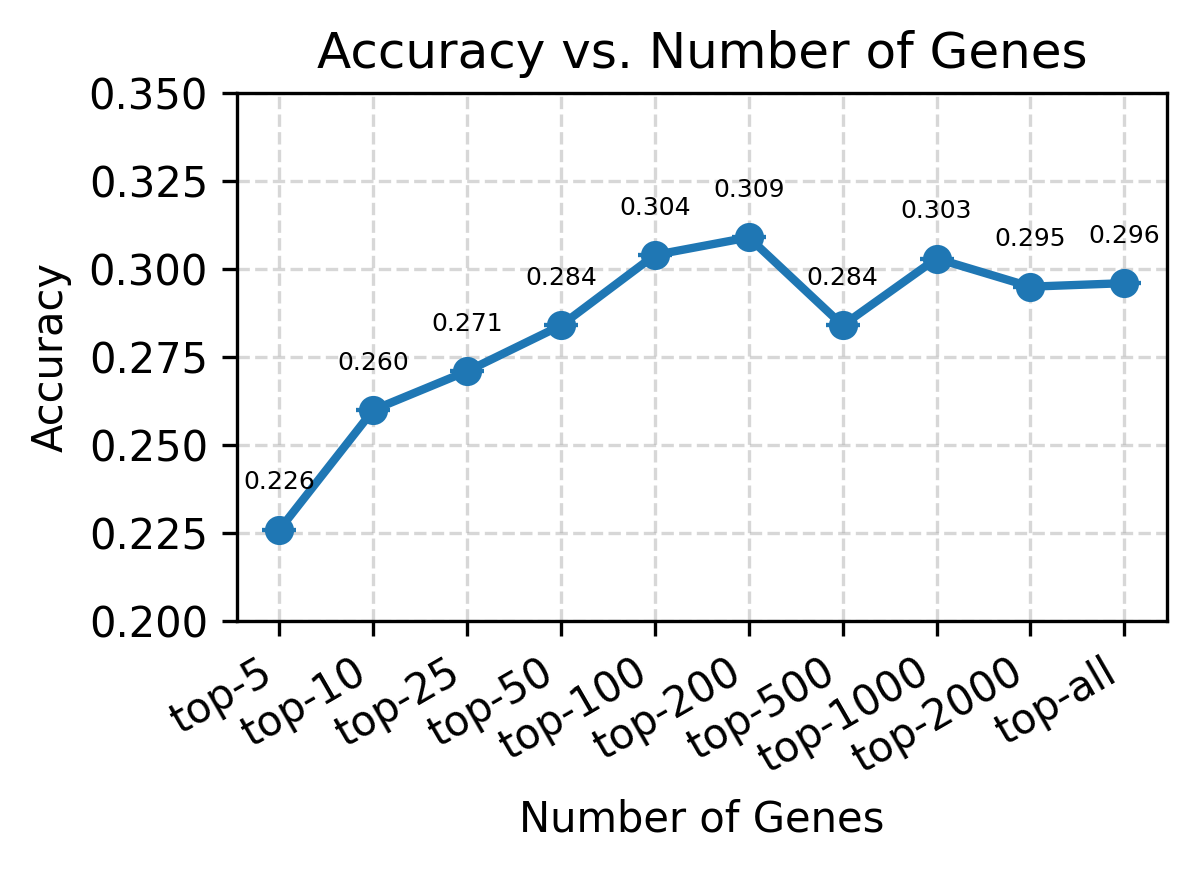

In [18]:
# ---- Plotting ----
plt.figure(figsize=(4, 3), dpi=300)   # High DPI for publication-quality
x_positions = np.arange(len(labels))

# Single color for line + markers + error bars
main_color = "C0"

# Plot the line + markers
plt.plot(
    x_positions,
    all_means,
    marker="o",
    linewidth=2,
    markersize=6,
    color=main_color,
    label="Accuracy"
)

# Add error bars separately with 'fmt="none"' so it doesn't replicate markers
plt.errorbar(
    x_positions,
    all_means,
    yerr=all_cis,
    fmt="none",
    ecolor=main_color,
    elinewidth=1.5,
    capsize=4
)

# Customize axes
plt.xticks(x_positions, labels, rotation=30, ha="right")
plt.xlabel("Number of Genes")
plt.ylabel("Accuracy")
plt.ylim(0.2, 0.35)
plt.title("Accuracy vs. Number of Genes")

# Optionally annotate each point with its mean accuracy
for x, mean_val, ci_val in zip(x_positions, all_means, all_cis):
    offset = ci_val + 0.01
    plt.text(x, mean_val + offset, f"{mean_val:.3f}",
             ha="center", va="bottom", fontsize=6)

# Turn on a light grid (often looks nice in publications)
plt.grid(True, which="major", linestyle="--", alpha=0.5)

# Tight layout for better spacing
plt.tight_layout()
plt.show()